In [44]:
from node2vec import Node2Vec
import igraph as ig
import matplotlib.pyplot as plt

In [85]:
def get_graph_embedding(graph, dimensions=64, walk_length=5, num_walks=200, workers=4):
    from node2vec import Node2Vec
    import igraph as ig

    # Let's assume you already have an iGraph graph
    #graph = ig.Graph.Erdos_Renyi(n=100, m=500)

    # Convert iGraph graph to NetworkX format (required by node2vec library)
    nx_graph = graph.to_networkx()

    # Precompute probabilities and generate walks
    node2vec = Node2Vec(nx_graph, dimensions=dimensions, 
                        walk_length=walk_length, num_walks=num_walks, workers=workers)

    # Embed nodes
    model = node2vec.fit(window=10, min_count=1, batch_words=4)
    
    import numpy as np
    N = len(model.wv.index_to_key)  # Get the number of nodes

    # Initialize an empty matrix
    embedding_matrix = np.zeros((N, model.vector_size))

    # Loop through the model to get the vectors
    for i in range(N):
        embedding_matrix[i] = model.wv[str(i)]  # model.wv vectors are ordered by the node's string value

    return pd.DataFrame(embedding_matrix, index=graph.vs['name'])

def multiplex_graph_embedding(MG, dimensions_list=[64,32], walk_length_list=[5,5], 
                              num_walks_list=[100,100], workers=4):
    """
    MG: multiplex graph, a list of igraph object
    """
    g_dtw, g_scenic = MG[0], MG[1]
    z0=get_graph_embedding(g_dtw,
                           dimensions=dimensions_list[0], 
                           walk_length=walk_length_list[0], 
                           num_walks=num_walks_list[0], workers=workers)
    z1=get_graph_embedding(g_scenic, 
                           dimensions=dimensions_list[1], 
                           walk_length=walk_length_list[1], 
                           num_walks=num_walks_list[1], workers=workers)
    import pandas as pd
    df = pd.merge(left=z0, right=z1, left_index=True, right_index=True)
    df.columns = range(1, len(df.columns) + 1)
    #embedding_matrix = np.concatenate([z0,z1], axis=1)
    return df

In [186]:
import pickle

with open("./FL-MG.pk", 'rb') as f:
    MG_FL = pickle.load(f)
    
# loading gene expression time series
ExprPath = "FL-time_series.csv"
import pandas as pd
time_series = pd.read_csv(ExprPath, index_col=0)


In [86]:
z_FL = multiplex_graph_embedding(MG_FL, 
                                 dimensions_list=[64,32], 
                                 walk_length_list=[50,50], 
                                 num_walks_list=[50,50], 
                                 workers=10)

Generating walks (CPU: 10): 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]









Generating walks (CPU: 10): 100%|██████████| 5/5 [00:20<00:00,  4.07s/it]











In [87]:
z_FL


,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
Mrpl15,-0.343176,-0.055479,0.214231,-0.255759,-0.164857,-0.033136,0.511771,-0.610346,-1.274717,-0.638608,...,0.335216,-0.125888,-0.332623,0.428454,-0.200397,-0.209549,-0.198580,-0.145433,0.275906,-0.043019
Vcpip1,0.491654,-1.159831,1.009698,0.249881,-0.206092,-0.897319,0.235325,-0.057304,-0.773112,0.349299,...,0.015553,0.029722,0.011987,-0.013289,-0.015603,0.000008,-0.008785,-0.005118,-0.011487,0.004443
Snhg6,-0.202377,-0.161820,0.896537,0.505178,0.648772,-0.419259,0.300417,0.270175,-0.509583,0.009082,...,-0.509174,-0.823144,-0.612735,0.385501,0.032611,-0.016372,0.135650,-0.462744,-0.113643,0.172083
Cops5,0.005912,-0.008227,-0.011478,0.004711,-0.008859,-0.009436,-0.001043,0.014331,-0.010743,0.011109,...,0.671652,0.270929,-0.203567,0.729502,-0.234937,0.345327,-0.357302,-0.029108,-0.103769,0.435775
Arfgef1,-1.075728,-0.601913,-0.370457,0.379003,-0.057377,0.510346,0.928540,-0.073517,-0.675533,0.278149,...,-0.672129,0.388825,0.525067,-0.247078,-0.808095,1.124892,0.361972,-1.302388,1.311554,0.477212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trappc2,0.235212,-0.256119,0.078665,0.794446,-0.229927,-0.227303,1.045564,-0.924427,0.270808,-0.209449,...,-0.010774,-0.007226,-0.030572,-0.019606,0.015818,0.017022,0.030335,-0.026714,0.001215,-0.019461
Arhgap6,-0.364269,0.086741,0.646683,0.670171,0.318067,-0.061975,-0.888500,0.101735,-0.156964,1.575634,...,0.045067,-0.267907,0.478717,-0.461230,-0.226381,-0.372202,0.741366,-0.477654,-0.319968,-0.203174
Ddx3y,0.010052,0.001443,0.000905,0.010907,0.011095,0.000434,-0.004099,0.010756,0.012172,0.010328,...,0.869116,-0.188257,0.406392,-0.001916,-0.698663,-0.683622,0.619438,-0.401848,-0.197171,0.539187
Eif2s3y,-0.040713,-1.277605,1.212487,-0.004073,0.353093,-0.230675,-1.025793,-0.705047,-0.534526,1.224691,...,-0.005306,0.023435,-0.015442,-0.024959,0.010375,-0.008266,-0.006191,0.007359,-0.002627,-0.029796


In [238]:
import pandas as pd
import numpy as np
from umap import UMAP
from sklearn.cluster import KMeans

# Assume we have the following 2D data:
data = z_FL
use_PCA = True

rownames = data.index
if use_PCA:
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    # first, apply PCA
    pca = PCA(n_components=50)
    data = pca.fit_transform(data_scaled)


    
# apply UMAP
umap = UMAP(n_components=2, min_dist=0.2)
data_umap = umap.fit_transform(data)
data_umap = pd.DataFrame(data_umap, index=rownames, columns=['umap0','umap1'])
gene_membership = data_umap 
gene_membership['gene']=gene_membership.index


/home/csj/micromamba/envs/r430py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15  clusters identified by k-means


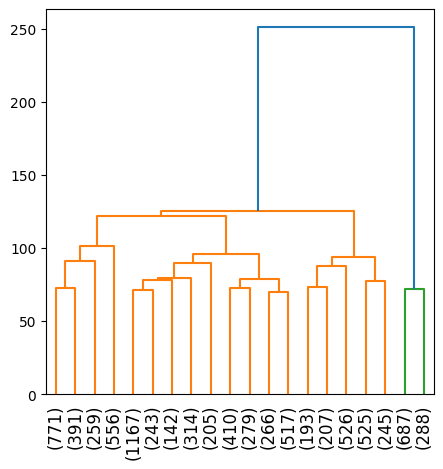

176 clusters identified by hierarchical clustering


In [244]:
##########################################
# set gene membership                    #
##########################################
gene_membership= gene_membership[['gene','umap0','umap1']].copy()

# perform clustering    
kmeans = KMeans(n_clusters=15, random_state=0)
kmeans.fit(data)
membership = kmeans.labels_+1
print(max(membership), ' clusters identified by k-means')
gene_membership['cluster_kmeans'] = membership
gene_membership['cluster_kmeans'] = gene_membership['cluster_kmeans'].astype('category')


from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data, 'ward')
plt.figure(figsize=(5, 5))
dendrogram(linked, 
           orientation='top',
           truncate_mode='lastp',  # show only the last p merged clusters
           p=20,  # show only the last 10 merged clusters
           distance_sort='descending',
           show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()

from scipy.cluster.hierarchy import fcluster
max_d = 30 # this is the maximum distance between two clusters
membership = fcluster(linked, max_d, criterion='distance')
print("%d clusters identified by hierarchical clustering"%max(membership))

gene_membership['cluster_hclust'] = membership
gene_membership['cluster_hclust'] = gene_membership['cluster_hclust'].astype('category')

##########################################
# calculate expression position profiles #
##########################################
gene_membership = pd.merge(left=gene_membership, 
         right=pd.DataFrame(time_series.sum(axis=1), columns=['expr_sum']), 
         left_index=True,right_index=True, how='left')

from scipy.signal import find_peaks
peak_pos = []
for gene in gene_membership.index:
    pos, _ = find_peaks(time_series.loc[gene], height=0.1, width=3)
    pos = np.mean(pos) if len(pos)>0 else np.nan
    peak_pos.append(pos)
gene_membership['peak_pos'] = peak_pos

##########################################
# calculate module information           #
##########################################
cluster_key = 'cluster_hclust' #group by this key
modules = gene_membership.groupby(cluster_key)['gene'].unique()
module_info = pd.DataFrame({ cluster_key:modules.index, 
                            'module_size':[len(mod)for mod in modules],
                            'member':modules})
module_info = pd.merge(left=module_info, 
    right=gene_membership.groupby(cluster_key).mean(numeric_only=True)[["expr_sum","peak_pos"]],
    left_index=True, right_index=True)

module_info = pd.merge(
    left=module_info, 
    right=gene_membership.groupby(cluster_key).std(numeric_only=True)[['peak_pos']],
    left_index=True, right_index=True)

module_info.columns= [cluster_key,'module_size','member','mean_expr','peakpos_mean','peakpos_std']




In [342]:
gene_membership

,gene,umap0,umap1,cluster_kmeans,cluster_hclust,expr_sum,peak_pos
Mrpl15,Mrpl15,8.703544,9.076680,11,94,4.451380,9.0
Vcpip1,Vcpip1,11.672185,3.205105,15,89,0.667799,NaN
Snhg6,Snhg6,9.084455,12.099557,12,173,4.602111,17.5
Cops5,Cops5,9.191370,-6.806408,3,3,14.554429,19.0
Arfgef1,Arfgef1,14.518492,9.330021,7,50,0.862612,NaN
...,...,...,...,...,...,...,...
Trappc2,Trappc2,12.485721,11.172663,9,14,2.933795,NaN
Arhgap6,Arhgap6,6.628819,7.514322,14,43,0.665911,NaN
Ddx3y,Ddx3y,9.631325,-6.743781,3,3,0.651475,NaN
Eif2s3y,Eif2s3y,10.535658,4.956639,5,99,0.973382,NaN


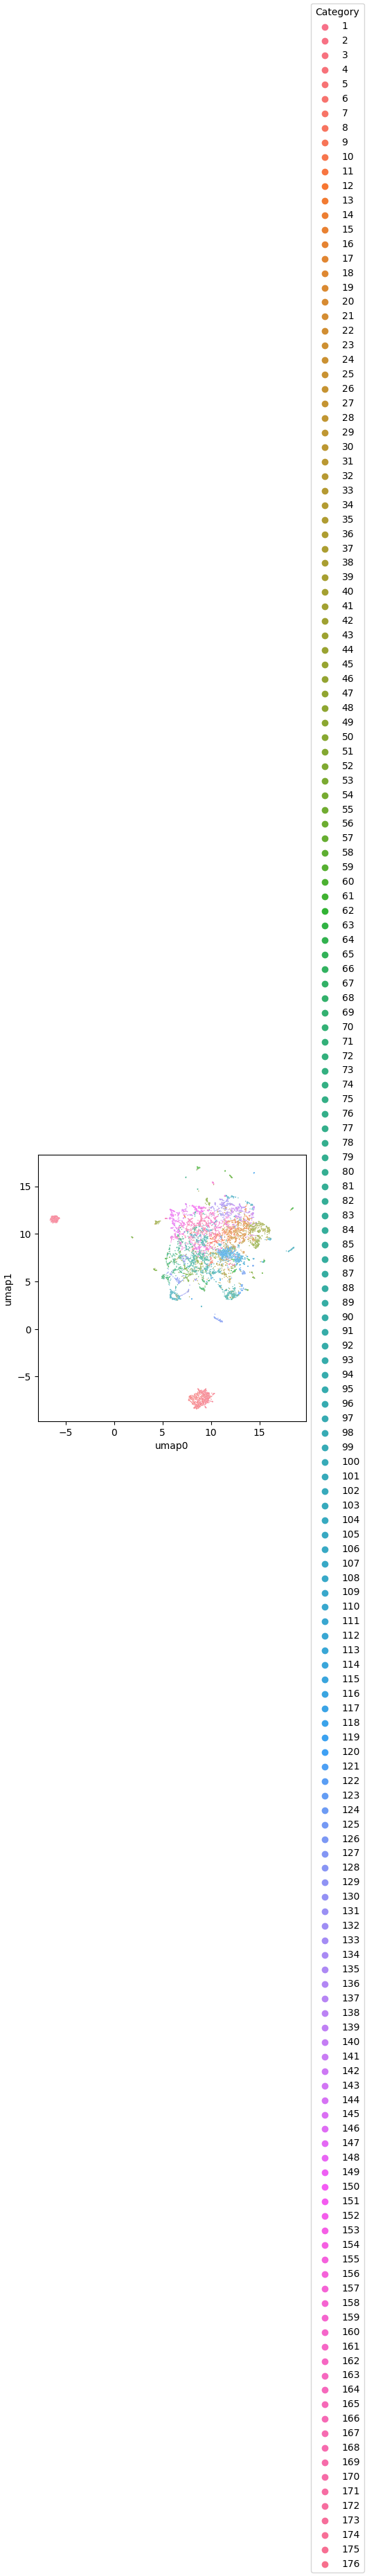

In [346]:
import seaborn as sns
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(data=gene_membership, x='umap0', y='umap1', hue='cluster_hclust', s=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Category')
plt.show()

In [247]:
module_info

,cluster_hclust,module_size,member,mean_expr,peakpos_mean,peakpos_std
cluster_hclust,,,,,,
1,1,288,"[Gtf3c3, Nhej1, Coq10b, Cyp20a1, Stk11ip, Fbxo...",5.423256,14.565359,6.947708
2,2,222,"[Rpl7, Dnpep, Actr3, Dars, Tmem183a, Rabgap1l,...",13.032919,15.169239,6.664359
3,3,167,"[Cops5, Farsb, Tsn, Eef1b2, Mff, Cops8, Acbd6,...",11.283060,16.061237,7.441195
4,4,108,"[Rnf149, Ppfia4, Nenf, Ptpn18, Ramp1, Mpc2, Cr...",12.453336,15.818376,7.253610
5,5,78,"[Fhl2, Serpine2, Ier5, Ctdsp1, Fam129a, Ccdc28...",7.858294,16.430233,8.638556
...,...,...,...,...,...,...
172,172,53,"[Rnf25, Hmga2, Tysnd1, Atpaf2, Tmem11, Rangrf,...",17.277795,16.729167,5.670651
173,173,53,"[Snhg6, Ccdc115, Mgst3, Nudt4, Prorsd1, Senp3,...",4.461656,18.668860,6.174407
174,174,66,"[Ppox, Arid5a, Casp8, Klhl30, Cenpw, Ncln, Mat...",11.756694,16.123457,7.454557


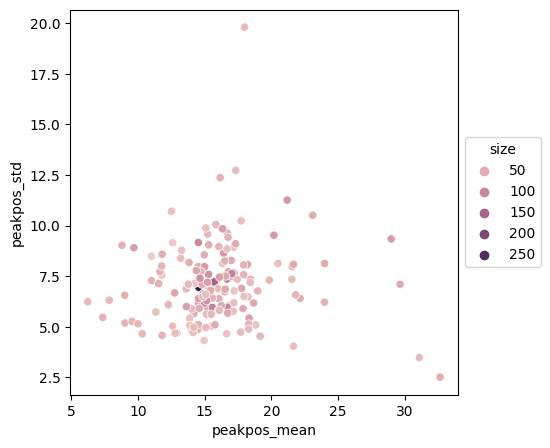

In [264]:
import seaborn as sns
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(data=module_info, x='peakpos_mean', y='peakpos_std', hue='module_size')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='size')
plt.show()

In [253]:
module_info

,cluster_hclust,module_size,member,mean_expr,peakpos_mean,peakpos_std
cluster_hclust,,,,,,
1,1,288,"[Gtf3c3, Nhej1, Coq10b, Cyp20a1, Stk11ip, Fbxo...",5.423256,14.565359,6.947708
2,2,222,"[Rpl7, Dnpep, Actr3, Dars, Tmem183a, Rabgap1l,...",13.032919,15.169239,6.664359
3,3,167,"[Cops5, Farsb, Tsn, Eef1b2, Mff, Cops8, Acbd6,...",11.283060,16.061237,7.441195
4,4,108,"[Rnf149, Ppfia4, Nenf, Ptpn18, Ramp1, Mpc2, Cr...",12.453336,15.818376,7.253610
5,5,78,"[Fhl2, Serpine2, Ier5, Ctdsp1, Fam129a, Ccdc28...",7.858294,16.430233,8.638556
...,...,...,...,...,...,...
172,172,53,"[Rnf25, Hmga2, Tysnd1, Atpaf2, Tmem11, Rangrf,...",17.277795,16.729167,5.670651
173,173,53,"[Snhg6, Ccdc115, Mgst3, Nudt4, Prorsd1, Senp3,...",4.461656,18.668860,6.174407
174,174,66,"[Ppox, Arid5a, Casp8, Klhl30, Cenpw, Ncln, Mat...",11.756694,16.123457,7.454557


In [319]:
def find_module_by_gene(gene_symbol, module_info):
    gene_symbol = "Gata3"
    sel = module_info['member'].apply(lambda x: gene_symbol in x)
    return module_info[sel]

def find_gene_coworkers(gene_symbol, module_info):
    mod = find_module_by_gene(gene_symbol='Gata3', module_info=module_info)
    return mod.iloc[0]['member'].tolist()

def plot_goi_timeseries(time_series, goi):
    from scipy.stats import zscore
    z_series = time_series.T.apply(zscore).T
    expr_df = z_series.loc[goi]
    import matplotlib.pyplot as plt
    from PyComplexHeatmap import ClusterMapPlotter
    plt.figure(figsize=(3, 10))
    cm = ClusterMapPlotter(data=expr_df.iloc[:50,],z_score=0,
                           row_cluster=False, row_dendrogram=False,
                           col_cluster=False, col_dendrogram=False,
                           show_rownames=True, show_colnames=False,row_names_side='left',
                           label='expression',cmap='bwr',#legend_kws={'vmin':-10.3, 'vmax':10.3},
                           rasterized=True, legend=True,legend_anchor='ax_heatmap')

    plt.show()

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


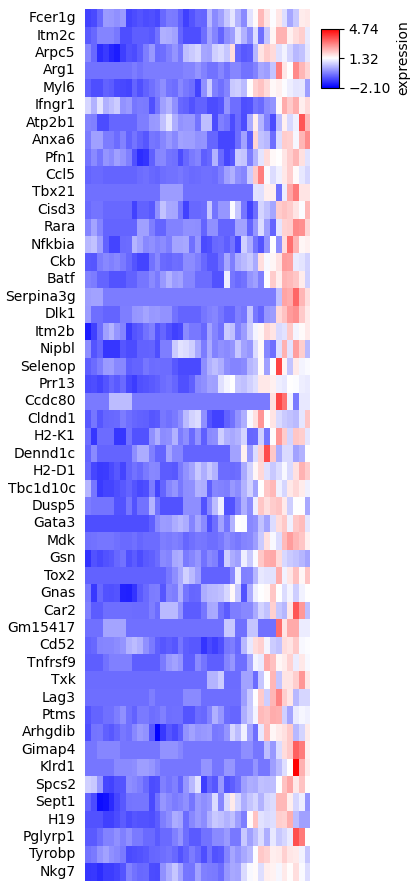

In [343]:
goi = find_gene_coworkers('Gata3', module_info)
plot_goi_timeseries(time_series, goi)

In [344]:
gene_membership.to_csv('gene_membership-FL.csv')

In [345]:
module_info.to_csv('module_info-FL.csv')

# below are deprecated

In [ ]:
import igraph as ig

# Create an example graph
g = ig.Graph()
g.add_vertices(6)
g.add_edges([(0, 1), (1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Define the list of vertex attribute values for the subgraph
attribute_list = ['A', 'B', 'C']

# Get the subgraph based on the vertex attribute values
subgraph = g.subgraph([v.index for v in g.vs if v['attribute'] in attribute_list])

# Print the subgraph summary
print(subgraph.summary())


In [338]:
import igraph as ig

# Create an example graph with vertex attributes
g = ig.Graph()
g.add_vertices(6)
g.add_edges([(0, 1), (1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])
g.vs["label"] = ["A", "B", "C", "D", "E", "F"]

# Define the attribute values for subgraph selection
attribute_value = "B"

# Get the indices of vertices with the specified attribute value
selected_vertices = [v.index for v in g.vs.select(label in attribute_value)]

# Extract the subgraph based on the selected vertices
subgraph = g.subgraph(selected_vertices)

# Print the subgraph summary
print(subgraph.summary())


NameError: name 'label' is not defined

In [ ]:
def get_subgraph_by_gene(g, gene_list, gene_key='name'):
    # Get the indices of vertices with the specified attribute value
    
    
    selected_vertices = [v.index for v in g.vs.select(label=attribute_value)]


In [339]:
import igraph as ig

# Create an example graph with node attributes
g = ig.Graph()
g.add_vertices(5)
g.vs["name"] = ["A", "B", "C", "D", "E"]
g.vs["value"] = [10, 20, 30, 40, 50]

# Iterate over nodes and their attributes
for node in g.vs:
    node_index = node.index
    node_name = node["name"]
    node_value = node["value"]
    print(f"Node index: {node_index}, Name: {node_name}, Value: {node_value}")


Node index: 0, Name: A, Value: 10
Node index: 1, Name: B, Value: 20
Node index: 2, Name: C, Value: 30
Node index: 3, Name: D, Value: 40
Node index: 4, Name: E, Value: 50


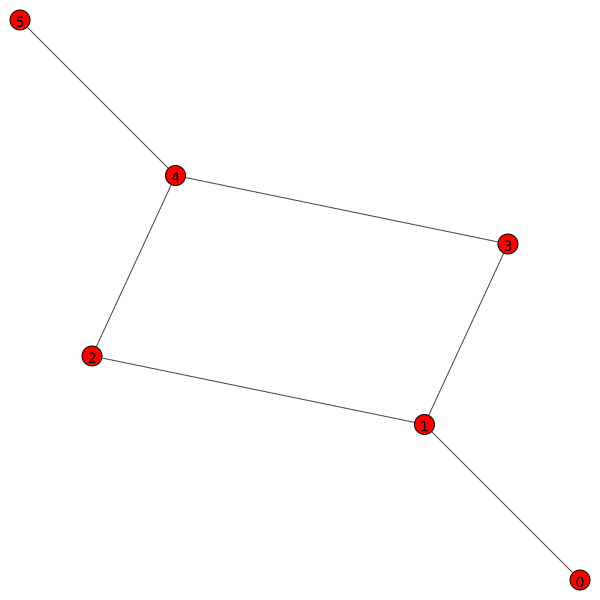

In [275]:
import igraph as ig
from igraph import plot


# Create the plot
visual_style = {}
visual_style["vertex_label"] = [str(i) for i in range(len(g.vs))]
plot(g, **visual_style)

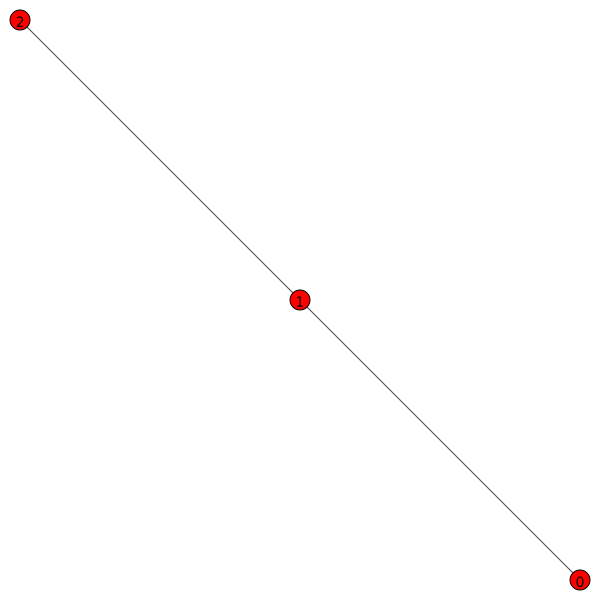

In [277]:
import igraph as ig
from igraph import plot


# Create the plot
visual_style = {}
visual_style["vertex_label"] = [str(i) for i in range(len(subgraph.vs))]
plot(subgraph, **visual_style)